<a href="https://colab.research.google.com/github/kiing-dom/CS4287/blob/main/Assignment1/CS4287_Prj1_20243561_20231717.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS4287 MLP

In [ ]:
# Dominion Gbadamosi - 20243561
# Ameen Popoola - 20231717

In [ ]:
#Imports
import numpy as np
import seaborn as sbn
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Visualization

In [ ]:
#Using Panda library to read the dataset
dataset = "Healthcare-Diabetes.csv"
df = pd.read_csv(dataset)

In [ ]:
#Display the first few rows of the dataset
display(df.head())

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Display the dataset's statistics
display(df.describe())

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


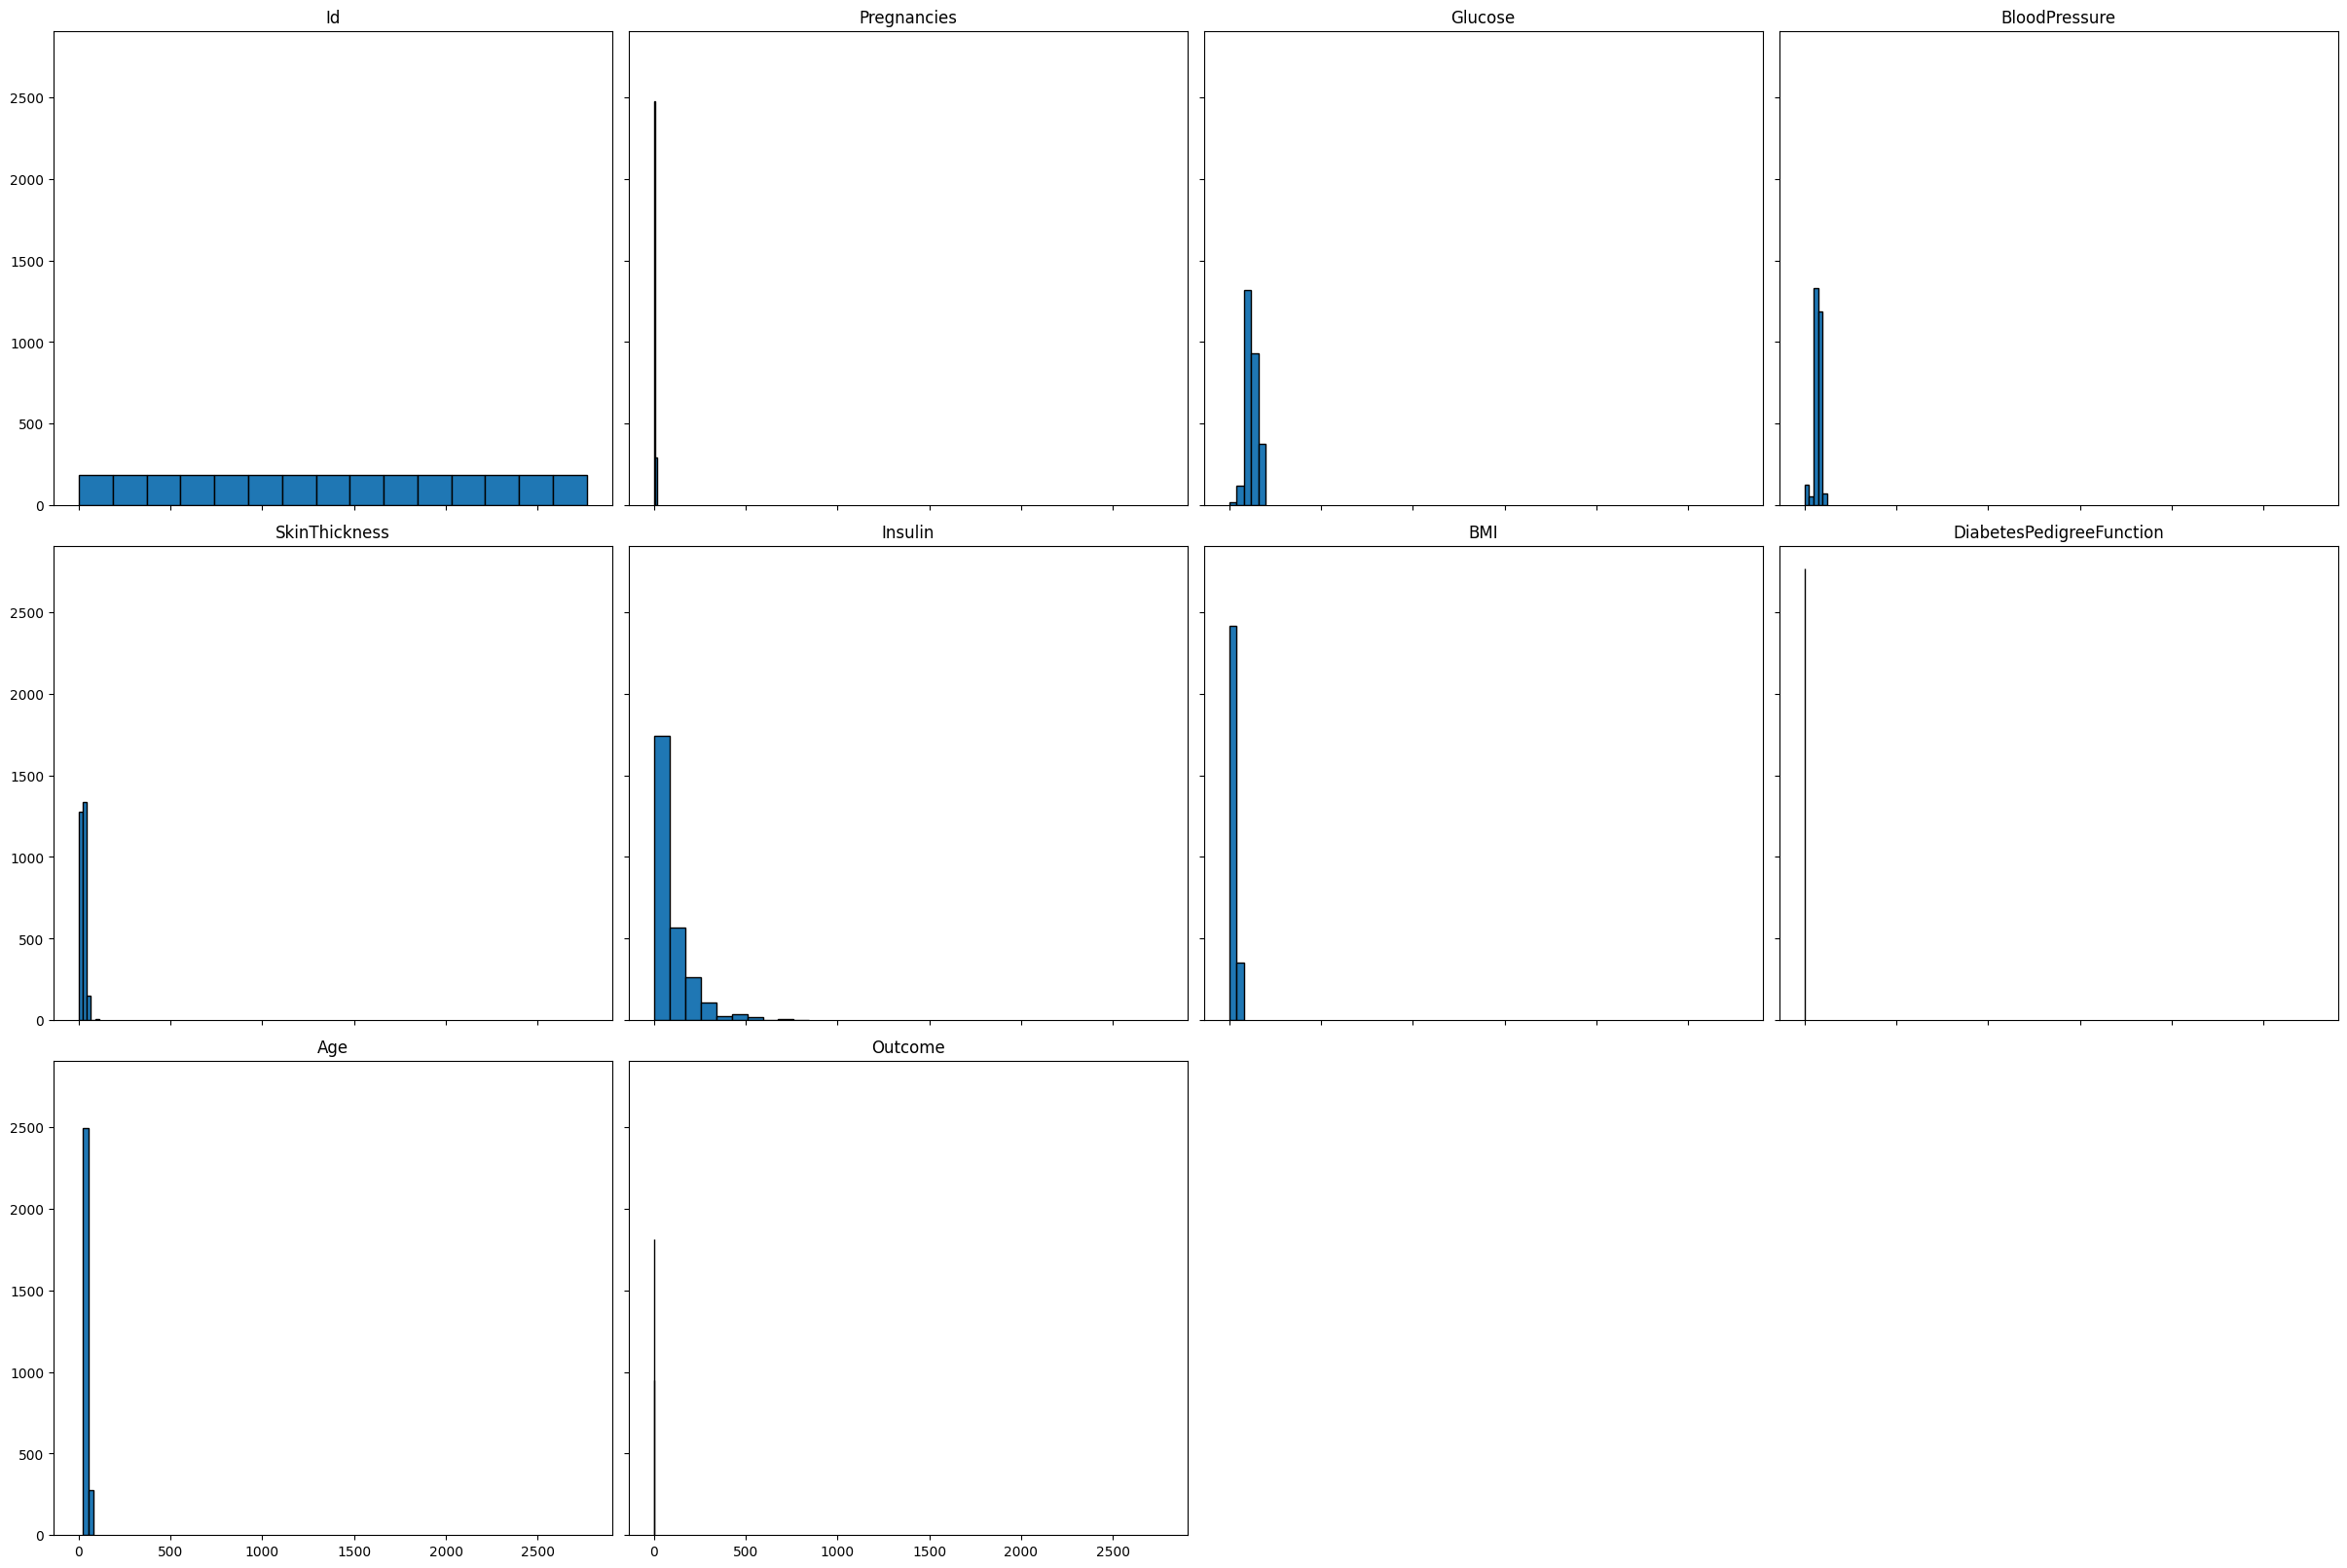

Counts for Id: [185. 184. 185. 184. 185. 184. 185. 184. 185. 184. 185. 184. 185. 184.
 185.]
Counts for Pregnancies: [2477.  291.]
Counts for Glucose: [  18.  121. 1316.  934.  379.]
Counts for BloodPressure: [ 128.   53. 1329. 1187.   71.]
Counts for SkinThickness: [1279. 1335.  149.    0.    5.]
Counts for Insulin: [1.74e+03 5.65e+02 2.62e+02 1.11e+02 2.70e+01 3.60e+01 1.70e+01 3.00e+00
 6.00e+00 1.00e+00]
Counts for BMI: [2414.  354.]
Counts for DiabetesPedigreeFunction: [2768.]
Counts for Age: [2492.  276.]
Counts for Outcome: [1816.  952.]


In [9]:
# Histogram plot for numerical attributes
# Determine the number of subplots based on the number of columns in the dataset
num_att = df.select_dtypes(include=['int64', 'float64'])
num_subplots = len(num_att.columns)

# Calculate the number of rows and columns based on the number of subplots
num_rows = int(np.sqrt(num_subplots))  # Square root to make a rough square layout
num_cols = (num_subplots + num_rows - 1) // num_rows

# Use shared axes to create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 16), sharex=True, sharey=True, constrained_layout=True)

axes = axes.flatten()

# Define a dictionary with the number of bins for each attribute
bins_per_attribute = {
    'Id': 15,
    'Pregnancies': 2,
    'Glucose': 5,
    'BloodPressure': 5,
    'SkinThickness': 5,
    'Insulin': 10,
    'BMI': 2,
    'DiabetesPedigreeFunction': 1,
    'Age': 2,
    'Outcome': 2
}

# Plot histograms for numerical attributes in each subplot
count_values = {}  # Dictionary to store count values for each subplot

# Plot histograms for numerical attributes in each subplot
for i, col in enumerate(num_att.columns):
    ax = axes[i]
    data = num_att[col]

    # Get the number of bins for the current attribute from the dictionary, defaulting to 10 if not specified
    num_bins = bins_per_attribute.get(col, 10)

    counts, bins, patches = axes[i].hist(data, bins=num_bins, edgecolor='k')
    axes[i].set_title(col)

    # Store the count values for this subplot
    count_values[col] = counts

# Remove any unused subplots
for i in range(num_subplots, len(axes)):
    fig.delaxes(axes[i])

# Show the plot
plt.show()

# Print the count values for each subplot
for col, counts in count_values.items():
    print(f'Counts for {col}: {counts}')